# Contour Detection

#### Contour is a curve joining all the continous points along the boundary of an object. Countours has thr same color and intensity

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

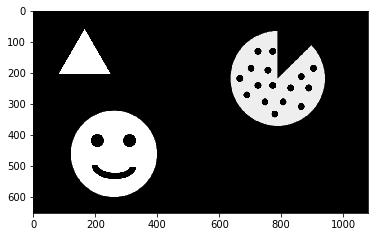

In [5]:
img = cv2.imread('internal_external.png',0)
plt.imshow(img, cmap='gray')

In [6]:
img.shape

(652, 1080)

In [12]:
#Extracting contours
contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

#### There are so many RETR functions used in the findContour function. Its based on these functions that the contours are calculated
#### We can get the internal, external or both using different RETR functions
* cv2.RETR_EXTERNAL:Only extracts external contours
* cv2.RETR_CCOMP: Extracts both internal and external contours organized in a two-level hierarchy
* cv2.RETR_TREE: Extracts both internal and external contours organized in a  tree graph
* cv2.RETR_LIST: Extracts all contours without any internal/external relationship

In [13]:
type(contours)

list

In [16]:
len(contours)

22

In [17]:
type(hierarchy)

numpy.ndarray

In [18]:
hierarchy.shape

(1, 22, 4)

In [19]:
hierarchy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

In [21]:
# Draw External Contours

# Set up empty array
external_contours = np.zeros(img.shape)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(external_contours, contours, i, 255, -1)

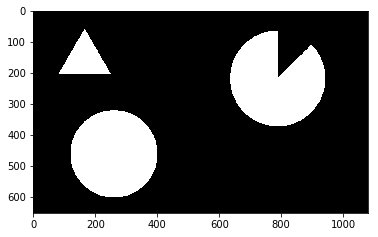

In [23]:
plt.imshow(external_contours, cmap='gray')

In [25]:
# Create empty array to hold all internal contours
internal_contour = np.zeros(img.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # If third column value is NOT equal to -1 than its internal
    if hierarchy[0][i][3] != -1:
        
        # Draw the Contour
        cv2.drawContours(internal_contour, contours, i, 255, -1)

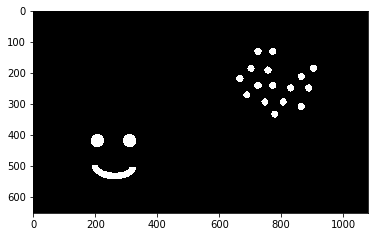

In [27]:
plt.imshow(internal_contour, cmap='gray')

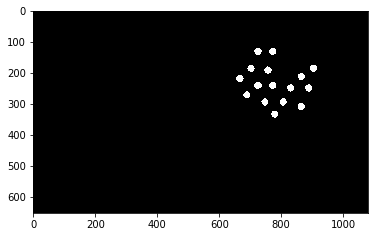

In [29]:
internal_pizza

In [30]:
# Create empty array to hold all internal contours
internal_face = np.zeros(img.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # If third column value is NOT equal to -1 than its internal, lets plot value 0
    if hierarchy[0][i][3] == 0:
        
        # Draw the Contour
        cv2.drawContours(internal_face, contours, i, 255, -1)

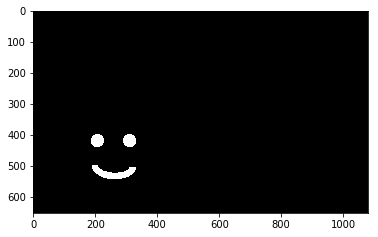

In [31]:
plt.imshow(internal_face, cmap='gray')

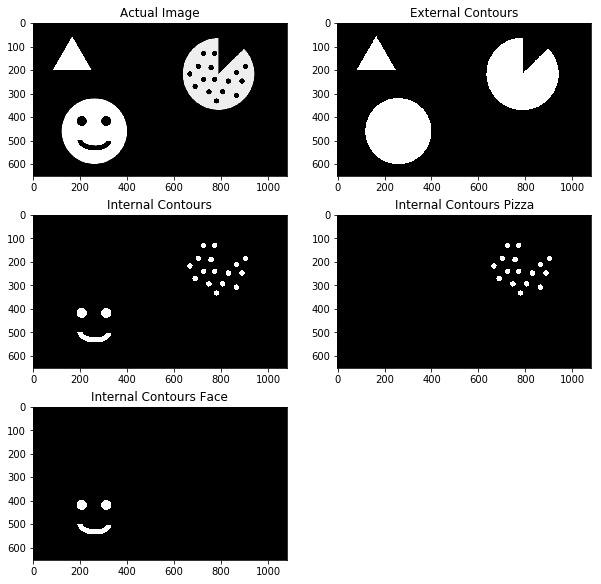

In [37]:
plt.figure(figsize=(10,10))
plt.subplot(321)
plt.imshow(img, cmap='gray')
plt.title("Actual Image")

plt.subplot(322)
plt.imshow(external_contours, cmap='gray')
plt.title("External Contours")

plt.subplot(323)
plt.imshow(internal_contour, cmap='gray')
plt.title("Internal Contours")

plt.subplot(324)
plt.imshow(internal_pizza, cmap='gray')
plt.title("Internal Contours Pizza")


plt.subplot(325)
plt.imshow(internal_face, cmap='gray')
plt.title("Internal Contours Face")

plt.show()